In [1]:
import pymysql.cursors
import pandas as pd
from datetime import datetime, timedelta
import calendar
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
#import pyodbc
#conn = pyodbc.connect("DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={0}; database={1};UID={2};PWD={3}".format('10.20.2.110,1433','AIG_DARAZ_PK_DW','daraz-tools','JfF7ziSCNk5jPxd'))
#cursor = conn.cursor()

#query = open('SqlForDailyDemandData.sql', 'r')
#dataFrame_initial = pd.read_sql_query(query.read(), conn)
#dataFrame_initial.shape

In [3]:
#dataFrame_initial.to_pickle('./dataFile',compression='infer', protocol=4)

In [4]:
df_initial = pd.read_pickle('./dataFile', compression='infer')

In [5]:
df_initial.dtypes

COD_SKU_CONFIG                object
date                          object
DSC_CATEGORY_NAME_LEVEL_1     object
DSC_CATEGORY_NAME_LEVEL_2     object
DSC_CATEGORY_NAME_LEVEL_3     object
DSC_CATEGORY_NAME_LEVEL_4     object
DSC_PRODUCT_NAME              object
DSC_PRODUCT_BRAND_NAME_EN     object
DSC_PRODUCT_SIZE              object
DSC_PRODUCT_COLOR             object
DSC_PRODUCT_WEIGHT            object
DSC_SHIPPING_METHOD           object
Android                        int64
Desktop                        int64
iOS                            int64
Mobile (Theme)                 int64
Amount                       float64
Valid Total                    int64
dtype: object

In [6]:
#query = open('ProductVisibility.sql', 'r')
#df_prodVisible = pd.read_sql_query(query.read(), conn)
#df_prodVisible.shape

In [7]:
#df_prodVisible.to_pickle('./productVisibilityDataFile',compression='infer', protocol=4)
df_prodVisible = pd.read_pickle('./productVisibilityDataFile', compression='infer')


In [8]:
df_initial['date'] = pd.to_datetime(df_initial['date'])
df_initial.sort_values(by='date').head()

,COD_SKU_CONFIG,date,DSC_CATEGORY_NAME_LEVEL_1,DSC_CATEGORY_NAME_LEVEL_2,DSC_CATEGORY_NAME_LEVEL_3,DSC_CATEGORY_NAME_LEVEL_4,DSC_PRODUCT_NAME,DSC_PRODUCT_BRAND_NAME_EN,DSC_PRODUCT_SIZE,DSC_PRODUCT_COLOR,DSC_PRODUCT_WEIGHT,DSC_SHIPPING_METHOD,Android,Desktop,iOS,Mobile (Theme),Amount,Valid Total
1066686,RO711EL1LP57QNAFAMZ,2017-12-01,Phones & Tablets,Phone & Tablet Accessories,Power Banks,7100 - 10000+ mAh Power Bank,Solo 3 Powerbank With Light- 6000mAh - White,Romoss,,White,0.5,UniversalShippingMatrix,1,0,0,0,968.0,1
548709,HA779HL0DDK8GNAFAMZ,2017-12-01,Appliances,Large Appliances,Cooling,Cooling,HSU-18LK10/L011 - Split Ac - 1.5 Ton - White,Haier - Official,,White,60,UniversalShippingMatrix,1,0,0,0,39578.0,1
1276971,TH134EL0L0D7YNAFAMZ,2017-12-01,Phones & Tablets,Phone & Tablet Accessories,Cases & Covers,Iphone & Ipad,Iphone X Premium Jelly Case - Transparent,Daraz Accessories,,Neutral,0.2,UniversalShippingMatrix,0,0,1,0,149.0,1
398560,EA835EL0WDZIMNAFAMZ,2017-12-01,Phones & Tablets,Phone & Tablet Accessories,Other Accessories,Others,Universal Mobile Phone GPS Car Holder 360 Degr...,Earldom,,Yellow & Black,0.2,UniversalShippingMatrix,1,0,0,0,750.0,1
271913,CM114EL0TWC9SNAFAMZ,2017-12-01,Phones & Tablets,Land Line,Corded,N/A,LCD Touch Panel Telephone With 8 Digit Calcula...,CM,,N/A,0.5,UniversalShippingMatrix,1,1,0,0,1099.0,2


In [9]:
#df_initial['DSC_PRODUCT_WEIGHT'].unique()

In [10]:
import re
df_initial['DSC_PRODUCT_WEIGHT'] = df_initial['DSC_PRODUCT_WEIGHT'].apply(lambda x : re.sub(r'#', r'0', str(x)))
df_initial['DSC_PRODUCT_WEIGHT'] = df_initial['DSC_PRODUCT_WEIGHT'].apply(lambda x : re.sub(r'[a-zA-Z]', '', str(x)))
df_initial['DSC_PRODUCT_WEIGHT'] = df_initial['DSC_PRODUCT_WEIGHT'].apply(lambda x : re.sub(r'([.])\1+', r'\1', str(x)))
df_initial['DSC_PRODUCT_WEIGHT'] = df_initial['DSC_PRODUCT_WEIGHT'].apply(lambda x : re.sub(r'/', r'', str(x)))
df_initial['DSC_PRODUCT_WEIGHT'] = df_initial['DSC_PRODUCT_WEIGHT'].apply(lambda x : re.sub(r'[!]', '0', str(x)))
df_initial['DSC_PRODUCT_WEIGHT'] = pd.to_numeric(df_initial['DSC_PRODUCT_WEIGHT'])


In [11]:
df_initial.describe()

,DSC_PRODUCT_WEIGHT,Android,Desktop,iOS,Mobile (Theme),Amount,Valid Total
count,1.420930e+06,1.421114e+06,1.421114e+06,1.421114e+06,1.421114e+06,1.421114e+06,1.421114e+06
mean,1.511359e+00,1.037528e+00,1.967263e+00,1.341194e-01,4.232299e-01,1.579521e+03,3.562140e+00
std,1.343679e+01,7.822131e+00,4.415733e+01,1.080168e+00,2.082007e+00,7.962584e+03,4.530361e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e-02,1.000000e+00
25%,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.900000e+02,1.000000e+00
50%,5.000000e-01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.990000e+02,1.000000e+00
75%,5.000000e-01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.090000e+03,1.000000e+00
max,5.000000e+03,1.429000e+03,1.120000e+04,4.560000e+02,8.810000e+02,3.498300e+06,1.120000e+04


In [12]:
df_initial[df_initial.DSC_PRODUCT_WEIGHT == df_initial['DSC_PRODUCT_WEIGHT'].max()]

,COD_SKU_CONFIG,date,DSC_CATEGORY_NAME_LEVEL_1,DSC_CATEGORY_NAME_LEVEL_2,DSC_CATEGORY_NAME_LEVEL_3,DSC_CATEGORY_NAME_LEVEL_4,DSC_PRODUCT_NAME,DSC_PRODUCT_BRAND_NAME_EN,DSC_PRODUCT_SIZE,DSC_PRODUCT_COLOR,DSC_PRODUCT_WEIGHT,DSC_SHIPPING_METHOD,Android,Desktop,iOS,Mobile (Theme),Amount,Valid Total
674458,KA934OT12OT9KNAFAMZ,2018-04-14,Grocer's Shop,Cooking Essentials,"Rice, Flours, Pulses & Grains",Rice,Extra-Long Grain 1121(pure Old Basmati) Rice 4...,Kainat,,white,5000.0,UniversalShippingMatrix,2,0,0,0,775.0,2
674459,KA934OT12OT9KNAFAMZ,2018-04-16,Grocer's Shop,Cooking Essentials,"Rice, Flours, Pulses & Grains",Rice,Extra-Long Grain 1121(pure Old Basmati) Rice 4...,Kainat,,white,5000.0,UniversalShippingMatrix,2,0,0,0,775.0,2


In [13]:
df_initial['CatConcat'] = df_initial[['DSC_CATEGORY_NAME_LEVEL_1', 'DSC_CATEGORY_NAME_LEVEL_2','DSC_CATEGORY_NAME_LEVEL_3','DSC_CATEGORY_NAME_LEVEL_4']].apply(lambda x: ' '.join(x.str.strip()), axis=1)

In [14]:
df_initial[df_initial.CatConcat == "Grocer's Shop Cooking Essentials Rice, Flours, Pulses & Grains Rice"]['DSC_PRODUCT_NAME'].value_counts()[:10]

Super Kernel Basmati Rice           137
Economy Rice - 1 Kg                 106
Basmati Rice - 1 Kg                 105
Sella Gold Rice - 1 Kg              102
Premium Basmati Rice - 1 Kg          95
Super Kernal Basmati Rice - 1 KG     91
Elite Steam Rice - 1Kg               90
Super Kernal Basmati Rice - 5 KG     89
Awami Rice - 1 KG                    86
Basmati Rice - 5 Kg                  81
Name: DSC_PRODUCT_NAME, dtype: int64

In [15]:
df_initial[df_initial.DSC_PRODUCT_NAME == 'Super Kernel Basmati Rice']['COD_SKU_CONFIG'].value_counts()

RE775OT1GWF5GNAFAMZ    105
BE493OT1AOE1ANAFAMZ     32
Name: COD_SKU_CONFIG, dtype: int64

In [16]:
df_initial[(df_initial.DSC_PRODUCT_NAME == 'Super Kernel Basmati Rice') &
           (df_initial.DSC_PRODUCT_BRAND_NAME_EN == 'Xidmat')]['date'].max()

Timestamp('2018-04-05 00:00:00')

In [17]:
newDf = df_initial[(df_initial.COD_SKU_CONFIG == 'RE775OT1GWF5GNAFAMZ')]['date'].to_frame()

newDf['CummulativeQuantity'] = df_initial[(df_initial.COD_SKU_CONFIG == 'RE775OT1GWF5GNAFAMZ')]['Valid Total'].cumsum()

newDf['DemandPercent'] = (newDf['CummulativeQuantity']/newDf['CummulativeQuantity'].iloc[-1])*100

In [18]:
#df_initial[(df_initial.COD_SKU_CONFIG == 'RE775OT1GWF5GNAFAMZ')].head()

In [19]:
#newDf[40:105]

Text(0.5,0,'Date')

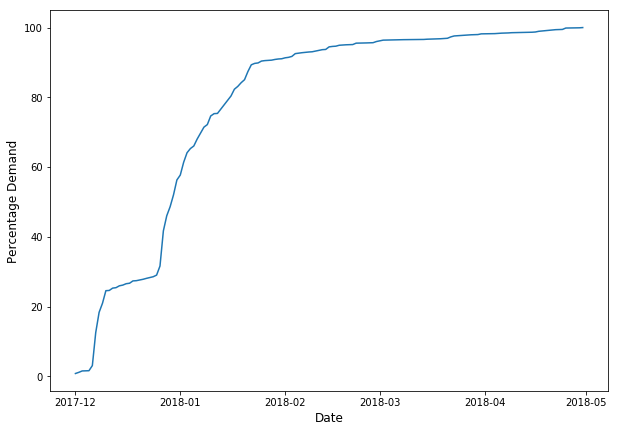

In [20]:
plt.figure(figsize=(10,7))
plt.plot(newDf.date, newDf.DemandPercent)
plt.ylabel('Percentage Demand', fontsize=12)
plt.xlabel('Date', fontsize=12)

In [21]:
df_prodVisible = df_prodVisible.fillna(0)

df_prodVisible = df_prodVisible.T

In [370]:
df_prodVisible.head(10)

DD_COD_SKU_CONFIG,00301FA0IW7BMNAFAMZ,00301FA0QSN4YNAFAMZ,00301FA0WQZ6QNAFAMZ,00301FA1IM7MANAFAMZ,10259FA000PQYNAFAMZ,10259FA002UWQNAFAMZ,10259FA0074AYNAFAMZ,10259FA00FGGINAFAMZ,10259FA00LZEANAFAMZ,10259FA00M5CQNAFAMZ,...,ZZ970FA12FBTMNAFAMZ,ZZ970FA138WHENAFAMZ,ZZ970FA153S1MNAFAMZ,ZZ970FA15MMWINAFAMZ,ZZ970FA17S89MNAFAMZ,ZZ970FA1BKYYANAFAMZ,ZZ970FA1E9URENAFAMZ,ZZ970FA1GESO2NAFAMZ,ZZ970FA1KKTWINAFAMZ,ZZ970FA1NHN1UNAFAMZ
2017-12-01,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2017-12-02,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2017-12-03,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2017-12-04,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2017-12-05,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2017-12-06,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2017-12-07,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2017-12-08,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2017-12-09,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2017-12-10,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df_prodVisible.columns = df_prodVisible.iloc[0]

df_prodVisible = df_prodVisible.reindex(df_prodVisible.index.drop('DD_COD_SKU_CONFIG'))

In [23]:
# import numpy as np
# def min_run_length(series):
#     terminal = pd.Series([0])
#     diffs = pd.concat([terminal, series, terminal]).diff()
#     starts = np.where(diffs == 1)
#     ends = np.where(diffs == 0)
#     return [(e-s, (s, e-1)) for s, e in zip(starts[0], ends[0])
#             if e - s >= 2]

# cols = df_prodVisible.columns[df_prodVisible.dtypes.eq('object')]
# df_prodVisible[cols] = df_prodVisible[cols].apply(pd.to_numeric, errors='coerce')

# #indices = {cname: min_run_length(df[cname]) for cname in df.columns}
# #print(indices)
# tt = min_run_length(df_prodVisible.iloc[:,0])
# print(indices)



In [24]:
def zero_runs(a):
    # Create an array that is 1 where a is 0, and pad each end with an extra 0.
    iszero = np.concatenate(([0], np.equal(a, 0).view(np.int8), [0]))
    absdiff = np.abs(np.diff(iszero))
    # Runs start and end where absdiff is 1.
    ranges = np.where(absdiff == 1)[0].reshape(-1, 2)
    return ranges

In [25]:
def getOfflineData(offlineRaw,SKU_name):
    dataFrame = pd.DataFrame()
    for ind, column in enumerate(offlineRaw.columns):
        runs = zero_runs(offlineRaw.iloc[:,ind])
        tuples = zip(offlineRaw.iloc[runs[:,0],0].index, runs[:,1] - runs[:,0])
        tempDf = {}
        cols = ['OfflineDate','OfflineDays']
        tuples = list(tuples)
        tempDf = pd.DataFrame.from_records(tuples,columns = cols)
        tempDf['SKU'] = column
        dataFrame = dataFrame.append(tempDf)
    return dataFrame
        

In [26]:
#formattedDf = getOfflineData(df_prodVisible,df_prodVisible.columns.values[0])
#formattedDf.to_pickle('./OfflineFormattedData',compression='infer', protocol=4)
formattedDf = pd.read_pickle('./OfflineFormattedData', compression='infer')
#formattedDf.head()

In [27]:
#Sample SKUs 00301FA0IW7BMNAFAMZ, 00301FA1IM7MANAFAMZ, 10259FA0074AYNAFAMZ
#formattedDf['OfflineDate'] = pd.to_datetime(formattedDf['OfflineDate'])
df_initial.dtypes

COD_SKU_CONFIG                       object
date                         datetime64[ns]
DSC_CATEGORY_NAME_LEVEL_1            object
DSC_CATEGORY_NAME_LEVEL_2            object
DSC_CATEGORY_NAME_LEVEL_3            object
DSC_CATEGORY_NAME_LEVEL_4            object
DSC_PRODUCT_NAME                     object
DSC_PRODUCT_BRAND_NAME_EN            object
DSC_PRODUCT_SIZE                     object
DSC_PRODUCT_COLOR                    object
DSC_PRODUCT_WEIGHT                  float64
DSC_SHIPPING_METHOD                  object
Android                               int64
Desktop                               int64
iOS                                   int64
Mobile (Theme)                        int64
Amount                              float64
Valid Total                           int64
CatConcat                            object
dtype: object

In [371]:
formattedDf[formattedDf.SKU == '10259FA0074AYNAFAMZ']

,OfflineDate,OfflineDays,SKU
0,2018-03-01,1,10259FA0074AYNAFAMZ
1,2018-03-03,1,10259FA0074AYNAFAMZ
2,2018-03-06,1,10259FA0074AYNAFAMZ
3,2018-03-10,3,10259FA0074AYNAFAMZ
4,2018-04-05,1,10259FA0074AYNAFAMZ
5,2018-04-17,1,10259FA0074AYNAFAMZ
6,2018-04-19,1,10259FA0074AYNAFAMZ


### Offline Product Similarity Match 

In [373]:
SKUid = '10259FA0074AYNAFAMZ'
PeriodStartDate = '2017-12-01'
categoryName = df_initial[df_initial.COD_SKU_CONFIG == SKUid]['CatConcat'].unique()
print(categoryName)
productame = df_initial[df_initial.COD_SKU_CONFIG == SKUid]['DSC_PRODUCT_NAME'].unique()
print(productame)
brandName = df_initial[df_initial.COD_SKU_CONFIG == SKUid]['DSC_PRODUCT_BRAND_NAME_EN'].unique()
print(brandName)
offlineStartDate = formattedDf[formattedDf.SKU == SKUid].iloc[0:1,0].values[0]
print(offlineStartDate)

offlineDays = formattedDf[formattedDf.SKU == SKUid].iloc[0:1,1].values[0]
print(offlineDays)

relevantSkuList = df_initial[(df_initial.CatConcat == categoryName[0]) & (df_initial.COD_SKU_CONFIG != SKUid)]['COD_SKU_CONFIG'].unique()
print('SKUs which have been sold during this period from this relevent category cluster ',len(relevantSkuList))

#print('No of records in this Category, whose demand data we have in our date range of 5 months:',len(df_initial[(df_initial.CatConcat == categoryName[0]) & (df_initial.COD_SKU_CONFIG != '00301FA0IW7BMNAFAMZ')].index))


["Women's Fashion Women's Accessories Jewellery Bangles & Bracelets"]
['Cross Design Cool Leather Bracelet']
['100 Degreez']
2018-03-01
1
SKUs which have been sold during this period from this relevent category cluster  1031


In [374]:
#df_initial[df_initial.COD_SKU_CONFIG == '36251FA01OSV6NAFAMZ']

In [375]:
#df_prodVisible[np.intersect1d(df_prodVisible.columns, list(relevantSkuList))].head()
#df_prodVisible[df_prodVisible.columns.intersection(list(relevantSkuList))].head()

In [376]:
releventSKUdataFrame = df_prodVisible[(datetime.strptime(PeriodStartDate, "%Y-%m-%d").strftime("%Y-%m-%d")) : (datetime.strptime(offlineStartDate, "%Y-%m-%d") + timedelta(days=int(offlineDays)-1)).strftime("%Y-%m-%d")]

releventSKUdataFrame = releventSKUdataFrame[releventSKUdataFrame.columns.intersection(list(relevantSkuList))].apply(pd.Series.value_counts)

In [377]:
releventSKUdataFrame

DD_COD_SKU_CONFIG,10259FA01EOKQNAFAMZ,10259FA01WFV6NAFAMZ,10259FA01YUNMNAFAMZ,10259FA027FAQNAFAMZ,10259FA031N9ENAFAMZ,10259FA0365AQNAFAMZ,10259FA03CSI4NAFAMZ,10259FA03RKWINAFAMZ,10259FA04D0IANAFAMZ,10259FA04L5PUNAFAMZ,...,ZA632FA033HK2NAFAMZ,ZA632FA0E4ZQQNAFAMZ,ZA632FA1LJ6V2NAFAMZ,ZE083FA0DJY3GNAFAMZ,ZE083FA1E5KFKNAFAMZ,ZE393FA07PNFKNAFAMZ,ZM378FA0PZ3V6NAFAMZ,ZM378FA0VXFWYNAFAMZ,ZU629FA0OYTOONAFAMZ,ZU629FAEPE3MNAFAMZ
0.0,39,1,1,1,1,22,1,28,1,3,...,80,80,71,37,1,91.0,47,73,1,1
1.0,52,90,90,90,90,69,90,63,90,88,...,11,11,20,54,90,NaN,44,18,90,90


In [378]:
findOnlineRelatedSKUs = releventSKUdataFrame

In [379]:
findOnlineRelatedSKUs = findOnlineRelatedSKUs.T

In [380]:
if findOnlineRelatedSKUs.shape[1] == 2:
     findOnlineRelatedSKUs.columns = ['Off', 'On']
else:
     findOnlineRelatedSKUs.columns = ['On']

In [381]:
findOnlineRelatedSKUs.shape

(1030, 2)

In [382]:
#Get SKUs from the smilar valid SKU list which were OnLine atleast
similarSKU4DC = findOnlineRelatedSKUs[findOnlineRelatedSKUs["On"] > 0].index
len(similarSKU4DC)

912

In [383]:
#formattedDf[formattedDf.SKU == SKUid]

In [384]:
demandCurveDf = df_initial[df_initial.COD_SKU_CONFIG.isin(similarSKU4DC)]
demandCurveDf = demandCurveDf[(demandCurveDf.date >= datetime.strptime(PeriodStartDate, "%Y-%m-%d")) 
             & (demandCurveDf.date <= datetime.strptime(offlineStartDate, "%Y-%m-%d") + timedelta(days=int(offlineDays)-1))]
#demandCurveDf = demandCurveDf['date'].to_frame()
demandCurveDf.shape

(1505, 19)

In [385]:
temp = pd.DataFrame(demandCurveDf.groupby(['date'])['Valid Total'].mean()).reset_index()
demandCurveDf = temp['date'].to_frame()
demandCurveDf['CummulativeQuantity'] = temp['Valid Total'].cumsum().round(1)
demandCurveDf['DemandPercent'] = (demandCurveDf['CummulativeQuantity']/demandCurveDf['CummulativeQuantity'].iloc[-1])*100
demandCurveDf

,date,CummulativeQuantity,DemandPercent
0,2017-12-01,1.2,1.158301
1,2017-12-02,2.4,2.316602
2,2017-12-03,3.6,3.474903
3,2017-12-04,4.6,4.440154
4,2017-12-05,5.6,5.405405
5,2017-12-06,6.8,6.563707
6,2017-12-07,7.9,7.625483
7,2017-12-08,9.1,8.783784
8,2017-12-09,10.5,10.135135
9,2017-12-10,11.7,11.293436


In [386]:
temp = df_initial[df_initial.COD_SKU_CONFIG == SKUid]
print
temp = temp[(temp.date >= datetime.strptime(PeriodStartDate, "%Y-%m-%d")) 
                     & (temp.date <= datetime.strptime(offlineStartDate, "%Y-%m-%d") + timedelta(days=int(offlineDays)-1))]

if temp['COD_SKU_CONFIG'].count() > 0:
    onlineDemand = 1
    demandCurveDf4Offline = temp['date'].to_frame()
    demandCurveDf4Offline['CummulativeQuantity'] = temp[(temp.COD_SKU_CONFIG == SKUid)]['Valid Total'].cumsum()
    demandCurveDf4Offline['DemandPercent'] = (demandCurveDf4Offline['CummulativeQuantity']/demandCurveDf4Offline['CummulativeQuantity'].iloc[-1])*100
    print(demandCurveDf4Offline)
    print("Recorded demand during Online period : ",temp['COD_SKU_CONFIG'].count())
else:
    onlineDemand = 0
    print("No Demand Recorded during Online period")

No Demand Recorded during Online period


In [368]:
if onlineDemand > 0:
    dateOfSoldOut = demandCurveDf4Offline[demandCurveDf4Offline.DemandPercent == 100]['date'].values[0]
    DemandPercentWhenSoldOut = demandCurveDf[demandCurveDf.date == dateOfSoldOut]['DemandPercent']/100
    CummulativeQuantityWhenSoldOut = demandCurveDf4Offline[demandCurveDf4Offline.DemandPercent == 100]['CummulativeQuantity']
    print("Cummulative Quantity When Sold Out:",CummulativeQuantityWhenSoldOut.values[0])
    print("Demand Percent of Category when the product soldout ",DemandPercentWhenSoldOut.values[0])
    EstiamtedLostSales = CummulativeQuantityWhenSoldOut/DemandPercentWhenSoldOut.values[0]
    print("Estiamted Lost Sales :",EstiamtedLostSales.values[0])

Cummulative Quantity When Sold Out: 1
Demand Percent of Category when the product soldout  0.2660256410256411
Estiamted Lost Sales : 3.7590361445783125


In [319]:
DemandPercentWhenSoldOut.value_counts()

0.365385    1
Name: DemandPercent, dtype: int64

In [332]:
def getEstimatedLostSale(SKUid,startDate,offlineStartDate,offlineDays):
    
    PeriodStartDate = startDate
    
    skuDemandCheckDf = df_initial[df_initial.COD_SKU_CONFIG == SKUid]

    skuDemandCheckDf = skuDemandCheckDf[(skuDemandCheckDf.date >= datetime.strptime(PeriodStartDate, "%Y-%m-%d")) 
                     & (skuDemandCheckDf.date <= datetime.strptime(offlineStartDate, "%Y-%m-%d") + timedelta(days=int(offlineDays)-1))]

     
    if PeriodStartDate == offlineStartDate:
        return "Product Offline : " + str(datetime.strptime(startDate, "%Y-%m-%d")) + " - " + str(datetime.strptime(offlineStartDate, "%Y-%m-%d") + timedelta(days=int(offlineDays)-1))
 
    elif skuDemandCheckDf['COD_SKU_CONFIG'].count() == 0:
        return "No Demand : " + str(datetime.strptime(startDate, "%Y-%m-%d")) + " - " + str(datetime.strptime(offlineStartDate, "%Y-%m-%d") + timedelta(days=int(offlineDays)-1))
    else:
        
        print("---------------------------------------------------------------------------")
        categoryName = df_initial[df_initial.COD_SKU_CONFIG == SKUid]['CatConcat'].unique()
        print("Category Concatented Name : ",categoryName)
        productame = df_initial[df_initial.COD_SKU_CONFIG == SKUid]['DSC_PRODUCT_NAME'].unique()
        print("Product Name : ",productame)
        brandName = df_initial[df_initial.COD_SKU_CONFIG == SKUid]['DSC_PRODUCT_BRAND_NAME_EN'].unique()
        print("Brand Name : ",brandName)
        
        print("Start Date",startDate, "OfflineDate", offlineStartDate , "Offline for Days", offlineDays)

        relevantSkuList = df_initial[(df_initial.CatConcat == categoryName[0]) & (df_initial.COD_SKU_CONFIG != SKUid)]['COD_SKU_CONFIG'].unique()
        print('Total Unique SKUs from this relevent category',len(relevantSkuList))
        
        releventSKUdataFrame = df_prodVisible[(datetime.strptime(PeriodStartDate, "%Y-%m-%d").strftime("%Y-%m-%d")) : (datetime.strptime(offlineStartDate, "%Y-%m-%d") + timedelta(days=int(offlineDays)-1)).strftime("%Y-%m-%d")]

        releventSKUdataFrame = releventSKUdataFrame[releventSKUdataFrame.columns.intersection(list(relevantSkuList))].apply(pd.Series.value_counts)
        
        #Get SKUs from the smilar valid SKU list which were OnLine atleast
        similarSKU4DC = findOnlineRelatedSKUs[findOnlineRelatedSKUs["On"] > 0].index
        print("Potential SKUs in the category to match with (Online Ones) : ", len(similarSKU4DC))
        
        
        demandCurveDf = df_initial[df_initial.COD_SKU_CONFIG.isin(similarSKU4DC)]
        demandCurveDf = demandCurveDf[(demandCurveDf.date >= datetime.strptime(PeriodStartDate, "%Y-%m-%d")) 
             & (demandCurveDf.date <= datetime.strptime(offlineStartDate, "%Y-%m-%d") + timedelta(days=int(offlineDays)-1))]
        
        temp = pd.DataFrame(demandCurveDf.groupby(['date'])['Valid Total'].mean()).reset_index()
        demandCurveDf = temp['date'].to_frame()
        demandCurveDf['CummulativeQuantity'] = temp['Valid Total'].cumsum().round(1)
        demandCurveDf['DemandPercent'] = (demandCurveDf['CummulativeQuantity']/demandCurveDf['CummulativeQuantity'].iloc[-1])*100
        demandCurveDf
        
        #####Demand Curve for Offlined SKU
        demandCurveDf4Offline = skuDemandCheckDf['date'].to_frame()
        demandCurveDf4Offline['CummulativeQuantity'] = skuDemandCheckDf[(skuDemandCheckDf.COD_SKU_CONFIG == SKUid)]['Valid Total'].cumsum()
        demandCurveDf4Offline['DemandPercent'] = (demandCurveDf4Offline['CummulativeQuantity']/demandCurveDf4Offline['CummulativeQuantity'].iloc[-1])*100
        demandCurveDf4Offline
        
        dateOfSoldOut = demandCurveDf4Offline[demandCurveDf4Offline.DemandPercent == 100]['date'].values[0]
        demandCurveDf4Offline
        DemandPercentWhenSoldOut = demandCurveDf[demandCurveDf.date == dateOfSoldOut]['DemandPercent']/100
        CummulativeQuantityWhenSoldOut = demandCurveDf4Offline[demandCurveDf4Offline.DemandPercent == 100]['CummulativeQuantity']
        
        print("Cummulative Quantity When Sold Out:",CummulativeQuantityWhenSoldOut.values[0])
        print("Demand Percent of Category when the product soldout ",DemandPercentWhenSoldOut.values[0])
        
        EstiamtedLostSales = CummulativeQuantityWhenSoldOut/DemandPercentWhenSoldOut.values[0]
        
        print("Estiamted Lost Sales :", EstiamtedLostSales.values[0])
        
        return EstiamtedLostSales.values[0]


In [285]:
getEstimatedLostSale(SKUid,PeriodStartDate,offlineStartDate,offlineDays)
#datetime.strptime("2018-12-01", "%Y-%m-%d") + timedelta(days=int(75))

---------------------------------------------------------------------------
["Women's Fashion Women's Clothing Pakistani & Traditional Clothing Unstitched Fabric"]
['Cream Top And Bottom With Red Dupatta Georgette Dress']
Brand Name :  ['0092 store']
2018-03-06
1
SKUs which have been sold during this period from this relevent category cluster  7147
Potential SKUs in the category to match with :  2755
Cummulative Quantity When Sold Out: 1
Demand Percent of Category when the product soldout  0.3653846153846153
Estiamted Lost Sales : 2.7368421052631584


2.7368421052631584

In [369]:
startDate = None
previousSKU = None
currentSKU = None
estLostSale = []
endDate = None 

for i, row in formattedDf[(formattedDf.SKU == '00301FA0QSN4YNAFAMZ') | (formattedDf.SKU == '00301FA0IW7BMNAFAMZ')].iterrows():
    currentSKU = row['SKU']
    if previousSKU == None:
        previousSKU = currentSKU
    elif previousSKU != currentSKU:
        startDate = None
        previousSKU = currentSKU
        print("SKU Mismatch.. Updating SKU")
    
    if startDate == None:
        startDate = row['OfflineDate']
        #print("Start : ",startDate)
        endDate = datetime.strptime(row['OfflineDate'], "%Y-%m-%d") + timedelta(days=int(row['OfflineDays'])-1)
        #print("End : ", endDate)
    else:
        startDate = endDate + timedelta(days=int(1))
        #print("Start : ",startDate)
        delta = startDate - (datetime.strptime(row['OfflineDate'], "%Y-%m-%d") + timedelta(days=int(row['OfflineDays'])-1))
        delta = delta.days * -1
        #print("Delta : ", delta)
        endDate = (datetime.strptime(startDate.strftime("%Y-%m-%d"), "%Y-%m-%d") + timedelta(days=int(delta)))
        #endDate = endDate.strftime("%Y-%m-%d")
        startDate = startDate.strftime("%Y-%m-%d")
        #print("End : ", endDate)
    estLostSale.append(getEstimatedLostSale(row['SKU'],startDate,row['OfflineDate'],row['OfflineDays']))

---------------------------------------------------------------------------
Category Concatented Name :  ["Women's Fashion Women's Clothing Pakistani & Traditional Clothing Unstitched Fabric"]
Product Name :  ['Cream Top And Bottom With Red Dupatta Georgette Dress']
Brand Name :  ['0092 store']
Start Date 2018-03-04 OfflineDate 2018-03-06 Offline for Days 1
Total Unique SKUs from this relevent category 7147
Potential SKUs in the category to match with (Online Ones) :  87
Cummulative Quantity When Sold Out: 1


IndexError: index 0 is out of bounds for axis 0 with size 0

In [327]:
#formattedDf[(formattedDf.SKU == '00301FA0QSN4YNAFAMZ') | (formattedDf.SKU == '00301FA0IW7BMNAFAMZ')]

In [353]:
temp = pd.concat([formattedDf[(formattedDf.SKU == '00301FA0QSN4YNAFAMZ') | (formattedDf.SKU == '00301FA0IW7BMNAFAMZ')].reset_index(),pd.DataFrame(estLostSale).reset_index()], axis=1) 
temp.columns = ['index', 'OfflineDate', 'OfflineDays', 'SKU', 'index', 'EstLostSales']
temp[['EstLostSales','OfflineDate', 'OfflineDays', 'SKU', ]]

,EstLostSales,OfflineDate,OfflineDays,SKU
0,Product Offline : 2017-12-01 00:00:00 - 2018-0...,2017-12-01,75,00301FA0IW7BMNAFAMZ
1,No Demand : 2018-02-14 00:00:00 - 2018-03-01 0...,2018-03-01,1,00301FA0IW7BMNAFAMZ
2,No Demand : 2018-03-02 00:00:00 - 2018-03-03 0...,2018-03-03,1,00301FA0IW7BMNAFAMZ
3,2.73684,2018-03-06,1,00301FA0IW7BMNAFAMZ
4,No Demand : 2018-03-07 00:00:00 - 2018-03-12 0...,2018-03-10,3,00301FA0IW7BMNAFAMZ
5,1.90816,2018-04-05,1,00301FA0IW7BMNAFAMZ
6,No Demand : 2018-04-06 00:00:00 - 2018-04-17 0...,2018-04-17,1,00301FA0IW7BMNAFAMZ
7,No Demand : 2018-04-18 00:00:00 - 2018-04-19 0...,2018-04-19,1,00301FA0IW7BMNAFAMZ
8,3.51579,2018-04-27,4,00301FA0IW7BMNAFAMZ
9,Product Offline : 2017-12-01 00:00:00 - 2018-0...,2017-12-01,35,00301FA0QSN4YNAFAMZ


In [128]:
(datetime.strptime(offlineStartDate, "%Y-%m-%d") + timedelta(days=int(offlineDays)-1))

datetime.datetime(2018, 2, 13, 0, 0)

In [113]:
datetime.strptime(formattedDf['OfflineDate'], "%Y-%m-%d") + timedelta(days=int(offlineDays)-1)

'2017-12-01'

In [122]:
delta = (datetime.strptime(PeriodStartDate, "%Y-%m-%d")) - (datetime.strptime(offlineStartDate, "%Y-%m-%d") + timedelta(days=int(offlineDays)-1))
delta.days * -1

74

In [152]:
formattedDf[:9]

,OfflineDate,OfflineDays,SKU
0,2017-12-01,75,00301FA0IW7BMNAFAMZ
1,2018-03-01,1,00301FA0IW7BMNAFAMZ
2,2018-03-03,1,00301FA0IW7BMNAFAMZ
3,2018-03-06,1,00301FA0IW7BMNAFAMZ
4,2018-03-10,3,00301FA0IW7BMNAFAMZ
5,2018-04-05,1,00301FA0IW7BMNAFAMZ
6,2018-04-17,1,00301FA0IW7BMNAFAMZ
7,2018-04-19,1,00301FA0IW7BMNAFAMZ
8,2018-04-27,4,00301FA0IW7BMNAFAMZ
